# DATA ANALYSIS | CLEANING DATA

### IQR & Standard Deviation

In [3]:
import pandas as pd
Location = 'datasets/gradedata.csv'
df = pd.read_csv(Location)
meangrade = df['grade'].mean()

stdgrade = df['grade'].std()
toprange = meangrade + stdgrade * 1.96
botrange = meangrade - stdgrade * 1.96
copydf = df
copydf = copydf.drop(copydf[copydf['grade'] > toprange].index)
copydf = copydf.drop(copydf[copydf['grade'] < botrange].index)
copydf.tail()

,fname,lname,gender,age,exercise,hours,grade,address
1995,Cody,Shepherd,male,19,1,8,80.1,"982 West Street, Alexandria, VA 22304"
1996,Geraldine,Peterson,female,16,4,18,100.0,"78 Morris Street, East Northport, NY 11731"
1997,Mercedes,Leon,female,18,3,14,84.9,"30 Glenridge Rd., Bountiful, UT 84010"
1998,Lucius,Rowland,male,16,1,7,69.1,"342 West Meadowbrook Lane, Helena, MT 59601"
1999,Linus,Morris,male,19,4,10,79.6,"81 Homestead Drive, Voorhees, NJ 08043"


In [7]:
import pandas as pd
Location = 'datasets/gradedata.csv'
df = pd.read_csv(Location)
q1 = df['grade'].quantile(.25)
q3 = df['grade'].quantile(.75)
iqr = q3-q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
copydf = df
copydf = copydf.drop(copydf[copydf['grade'] > toprange].index)
copydf = copydf.drop(copydf[copydf['grade'] < botrange].index)
copydf.tail()

,fname,lname,gender,age,exercise,hours,grade,address
1995,Cody,Shepherd,male,19,1,8,80.1,"982 West Street, Alexandria, VA 22304"
1996,Geraldine,Peterson,female,16,4,18,100.0,"78 Morris Street, East Northport, NY 11731"
1997,Mercedes,Leon,female,18,3,14,84.9,"30 Glenridge Rd., Bountiful, UT 84010"
1998,Lucius,Rowland,male,16,1,7,69.1,"342 West Meadowbrook Lane, Helena, MT 59601"
1999,Linus,Morris,male,19,4,10,79.6,"81 Homestead Drive, Voorhees, NJ 08043"


# Cleaning Data in Pandas Dataframes

In [16]:
import pandas as pd
df = pd.read_csv("datasets/gradedatamissing.csv")
df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"7379 Highland Rd. , Dublin, GA 31021"
1,Kadeem,Morrison,male,18,4,4,78.2,"8 Bayport St. , Honolulu, HI 96815"
2,Nash,Powell,male,18,5,9,79.3,"Encino, CA 91316, 3 Lilac Street"
3,Noelani,Wagner,female,14,2,7,83.2,"Riverview, FL 33569, 9998 North Smith Dr."
4,Noelani,Cherry,female,18,4,15,87.4,"97 SE. Ocean Street , Bethlehem, PA 18015"


### Count rows with missing data

In [28]:
df_no_missing = df.dropna()
df_no_missing.count()

### Add a Column with Empty Values

In [39]:
import numpy as np
df['newcol'] = np.nan
df.head(1)

### Drop Completely Empty Columns

In [36]:
df.dropna(axis=1, how='all')
df.head(1)

,fname,lname,gender,age,exercise,hours,grade,address,NEW_COLUMN
0,Marcia,Pugh,female,17,3,10,82.4,"7379 Highland Rd. , Dublin, GA 31021",NaN


In [ ]:
df = df.drop(columns = ['NEW_COLUMN'])

### Replace Empty Cells with 0

In [40]:
df.fillna(0)
df.head(1)

,fname,lname,gender,age,exercise,hours,grade,address,newcol
0,Marcia,Pugh,female,17,3,10,82.4,"7379 Highland Rd. , Dublin, GA 31021",NaN


### Replace NaN with 0

In [42]:
df.replace(np.nan, 0, inplace=True)
df.head(1)

,fname,lname,gender,age,exercise,hours,grade,address,newcol
0,Marcia,Pugh,female,17,3,10,82.4,"7379 Highland Rd. , Dublin, GA 31021",0.0


### Data Imputation with average of the data

In [46]:
df["grade"].fillna(df["grade"].mean(), inplace=True)
df.head()

,fname,lname,gender,age,exercise,hours,grade,address,newcol
0,Marcia,Pugh,female,17,3,10,82.4,"7379 Highland Rd. , Dublin, GA 31021",0.0
1,Kadeem,Morrison,male,18,4,4,78.2,"8 Bayport St. , Honolulu, HI 96815",0.0
2,Nash,Powell,male,18,5,9,79.3,"Encino, CA 91316, 3 Lilac Street",0.0
3,Noelani,Wagner,female,14,2,7,83.2,"Riverview, FL 33569, 9998 North Smith Dr.",0.0
4,Noelani,Cherry,female,18,4,15,87.4,"97 SE. Ocean Street , Bethlehem, PA 18015",0.0


### New Column with average of the data

In [52]:
df['newcol'] = df["grade"].mean()
df.head(1)

,fname,lname,gender,age,exercise,hours,grade,address,newcol
0,Marcia,Pugh,female,17,3,10,82.4,"7379 Highland Rd. , Dublin, GA 31021",82.55605


## DATA SELECTION

#### Select rows but ignore the ones with missing data points.

In [53]:
df["grade"].fillna(df.groupby("gender")["grade"].transform("mean"), inplace=True)

#### Selecting Rows with No Missing Age or Gender

In [55]:
df2 = df[df['age'].notnull() & df['gender'].notnull()]
df2.head(1)

,fname,lname,gender,age,exercise,hours,grade,address,newcol
0,Marcia,Pugh,female,17,3,10,82.4,"7379 Highland Rd. , Dublin, GA 31021",82.55605


## Filtering Inappropriate Values

Any anomalous values that the analyst deemed not necessary in the analysis. These are usually domain related bussiness rules

In [68]:
import pandas as pd
names = ['Jan','John','Bob','Jan','Mary','Jon','Mel','Mel','Mel']
grades = [95,78,76,95,77,78,99,100,100]
GradeList = list(zip(names,grades))
df = pd.DataFrame(data = GradeList,columns=['Names', 'Grades'])
df

,Names,Grades
0,Jan,95
1,John,78
2,Bob,76
3,Jan,95
4,Mary,77
5,Jon,78
6,Mel,99
7,Mel,100
8,Mel,100


In [69]:
df.duplicated()

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8     True
dtype: bool

#### Displaying Dataset without Duplicates on all columns : drop_duplicates()

In [70]:
# these will compare all the values on each column and drop any duplicate
no_dup = df.drop_duplicates()
no_dup

,Names,Grades
0,Jan,95
1,John,78
2,Bob,76
4,Mary,77
5,Jon,78
6,Mel,99
7,Mel,100


#### Dataset without Duplicates on a given column

In [71]:
df.drop_duplicates(['Names'], keep='last')

,Names,Grades
1,John,78
2,Bob,76
3,Jan,95
4,Mary,77
5,Jon,78
8,Mel,100


## CLEAN DATA

exclude parameter for list of values to be excluded

In [73]:
import pandas as pd
Location = "datasets/gradedata.csv"
## To add headers as we load the data...
df = pd.read_csv(Location)
df.head()
import string
exclude = set(string.punctuation)
def remove_punctuation(x):
    try:
        x = ''.join(ch for ch in x if ch not in exclude)
    except:
        pass
    return x
df.address = df.address.apply(remove_punctuation)
df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,9253 Richardson Road Matawan NJ 07747
1,Kadeem,Morrison,male,18,4,4,78.2,33 Spring Dr Taunton MA 02780
2,Nash,Powell,male,18,5,9,79.3,41 Hill Avenue Mentor OH 44060
3,Noelani,Wagner,female,14,2,7,83.2,8839 Marshall St Miami FL 33125
4,Noelani,Cherry,female,18,4,15,87.4,8304 Charles Rd Lewis Center OH 43035


In [75]:
def remove_whitespace(x):
    try:
        x = ''.join(x.split())
    except:
        pass
    return x
df.address = df.address.apply(remove_whitespace)
df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,9253RichardsonRoadMatawanNJ07747
1,Kadeem,Morrison,male,18,4,4,78.2,33SpringDrTauntonMA02780
2,Nash,Powell,male,18,5,9,79.3,41HillAvenueMentorOH44060
3,Noelani,Wagner,female,14,2,7,83.2,8839MarshallStMiamiFL33125
4,Noelani,Cherry,female,18,4,15,87.4,8304CharlesRdLewisCenterOH43035


## Standardizing Dates

In [79]:
import pandas as pd
names = ['Bob','Jessica','Mary','John','Mel']
grades = [76,95,77,78,99]
bsdegrees = [1,1,0,0,1]
msdegrees = [2,1,0,0,0]
phddegrees = [0,1,0,0,0]
bdates = ['1/1/1945','10/21/76','3/3/90','04/30/1901','1963-09-01']
GradeList = list(zip(names,grades,bsdegrees,msdegrees,phddegrees,bdates))
columns=['Names','Grades','BS','MS','PhD',"bdates"]
df = pd.DataFrame(data = GradeList, columns=columns)
df

,Names,Grades,BS,MS,PhD,bdates
0,Bob,76,1,2,0,1/1/1945
1,Jessica,95,1,1,1,10/21/76
2,Mary,77,0,0,0,3/3/90
3,John,78,0,0,0,04/30/1901
4,Mel,99,1,0,0,1963-09-01


In [86]:
import pandas as pd
names = ['Bob','Jessica','Mary','John','Mel']
grades = [76,95,77,78,99]
bsdegrees = [1,1,0,0,1]
msdegrees = [2,1,0,0,0]
phddegrees = [0,1,0,0,0]
ssns = ['867-53-0909','333-22-4444','123-12-1234','777-93-9311','123-12-1423']
GradeList = list(zip(names,grades,bsdegrees,msdegrees,phddegrees,ssns))
columns=['Names','Grades','BS','MS','PhD',"ssn"]
df = pd.DataFrame(data = GradeList, columns=columns)
df

,Names,Grades,BS,MS,PhD,ssn
0,Bob,76,1,2,0,867-53-0909
1,Jessica,95,1,1,1,333-22-4444
2,Mary,77,0,0,0,123-12-1234
3,John,78,0,0,0,777-93-9311
4,Mel,99,1,0,0,123-12-1423


In [88]:
def right(s, amount):
    return s[-amount]

def standardize_ssn(ssn):
    try:
        ssn = ssn.replace("-","")
        ssn = "".join(ssn.split())
        if len(ssn)< 9 and ssn != 'Missing':
            ssn="000000000" + ssn
            ssn=right(ssn,9)
    except:
        pass
    return ssn

df.ssn = df.ssn.apply(standardize_ssn)
df

,Names,Grades,BS,MS,PhD,ssn
0,Bob,76,1,2,0,867530909
1,Jessica,95,1,1,1,333224444
2,Mary,77,0,0,0,123121234
3,John,78,0,0,0,777939311
4,Mel,99,1,0,0,123121423


## BINNING

In [89]:
import pandas as pd
Location = 'datasets/gradedata.csv'
df = pd.read_csv(Location)
df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


In [91]:
# Create the bin dividers
bins = [0, 60, 70, 80, 90, 100]
# Create names for the four groups
group_names = ['F', 'D', 'C', 'B', 'A']
df['lettergrade'] = pd.cut(df['grade'], bins,labels=group_names)
df.head()

,fname,lname,gender,age,exercise,hours,grade,address,lettergrade
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747",B
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780",C
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060",C
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125",B
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035",B


#### COUNT THE OBSERVATIONS

In [92]:
pd.value_counts(df['lettergrade'])

B    737
C    580
A    475
D    193
F     15
Name: lettergrade, dtype: int64

Applying Function to Newly Created Bin

#### GROUPBY

In [94]:
df.groupby('lettergrade')['hours'].mean()

lettergrade
F     3.933333
D     5.544041
C     8.381034
B    11.827680
A    15.305263
Name: hours, dtype: float64

#### APPLY INT FUNCTION (REMOVE DECIMAL)

In [95]:
# Applying the integer function to the grade column
df['grade'] = df['grade'] = df['grade'].apply(lambda x: int(x))
df.head()

,fname,lname,gender,age,exercise,hours,grade,address,lettergrade
0,Marcia,Pugh,female,17,3,10,82,"9253 Richardson Road, Matawan, NJ 07747",B
1,Kadeem,Morrison,male,18,4,4,78,"33 Spring Dr., Taunton, MA 02780",C
2,Nash,Powell,male,18,5,9,79,"41 Hill Avenue, Mentor, OH 44060",C
3,Noelani,Wagner,female,14,2,7,83,"8839 Marshall St., Miami, FL 33125",B
4,Noelani,Cherry,female,18,4,15,87,"8304 Charles Rd., Lewis Center, OH 43035",B


#### Applying a Function to a Group

In [96]:
gender_AveScore = df['grade'].groupby(df['gender'])
gender_AveScore.mean()

gender
female    82.341
male      81.981
Name: grade, dtype: float64

## RANKING

In [97]:
import pandas as pd
Location = "datasets/gradedata.csv"
df = pd.read_csv(Location)
df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


In [98]:
df['graderanked'] = df['grade'].rank(ascending=1)
df.tail()

,fname,lname,gender,age,exercise,hours,grade,address,graderanked
1995,Cody,Shepherd,male,19,1,8,80.1,"982 West Street, Alexandria, VA 22304",794.0
1996,Geraldine,Peterson,female,16,4,18,100.0,"78 Morris Street, East Northport, NY 11731",1957.0
1997,Mercedes,Leon,female,18,3,14,84.9,"30 Glenridge Rd., Bountiful, UT 84010",1158.5
1998,Lucius,Rowland,male,16,1,7,69.1,"342 West Meadowbrook Lane, Helena, MT 59601",180.0
1999,Linus,Morris,male,19,4,10,79.6,"81 Homestead Drive, Voorhees, NJ 08043",770.0


#### BOTTOM 20

In [100]:
bottom_20 = df[df['graderanked'] < 21]
bottom_20.head()

,fname,lname,gender,age,exercise,hours,grade,address,graderanked
340,Abbot,Hall,male,16,4,3,58.9,"84 Rock Creek Lane, Durham, NC 27703",7.5
388,Colton,Ochoa,male,17,1,4,60.3,"75 Arrowhead Drive, Danvers, MA 01923",18.5
410,Linda,Baldwin,female,16,5,2,59.0,"970 SW. Second Ave., Cedar Falls, IA 50613",9.0
528,Chester,Vance,male,17,1,5,60.1,"732 Randall Mill Street, Covington, GA 30014",16.5
556,Lacey,Nieves,female,18,1,2,57.9,"38 West Brickyard Avenue, Roslindale, MA 02131",6.0


#### BOTTOM 5 SORTED

In [101]:
df[df['graderanked'] < 6].sort_values('graderanked')

,fname,lname,gender,age,exercise,hours,grade,address,graderanked
664,Alika,Poole,female,19,2,16,32.0,"9282 Purple Finch Lane, Lexington, NC 27292",1.0
972,Keegan,Rasmussen,male,19,4,3,43.0,"876 East Pilgrim Street, Chelmsford, MA 01824",2.0
1870,Levi,Coleman,male,19,3,3,55.9,"9453 Laurel Street, Jersey City, NJ 07302",3.0
1910,Gail,Mcneil,female,17,2,3,56.1,"8409A Spruce St., Fishers, IN 46037",4.0
1494,Jenna,Wagner,female,16,1,3,56.3,"8829 Shore Dr., Hopewell Junction, NY 12533",5.0


# CREATE COLUMNS

#### Generate New Column Based on a Conditional

In [2]:
import pandas as pd
Location = "datasets/gradedata.csv"
df = pd.read_csv(Location)
df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


#### Failing Column

In [3]:
import numpy as np
df['isFailing'] = np.where(df['grade']<70,'yes', 'no')
df.tail(5)

,fname,lname,gender,age,exercise,hours,grade,address,isFailing
1995,Cody,Shepherd,male,19,1,8,80.1,"982 West Street, Alexandria, VA 22304",no
1996,Geraldine,Peterson,female,16,4,18,100.0,"78 Morris Street, East Northport, NY 11731",no
1997,Mercedes,Leon,female,18,3,14,84.9,"30 Glenridge Rd., Bountiful, UT 84010",no
1998,Lucius,Rowland,male,16,1,7,69.1,"342 West Meadowbrook Lane, Helena, MT 59601",yes
1999,Linus,Morris,male,19,4,10,79.6,"81 Homestead Drive, Voorhees, NJ 08043",no


#### Failing Column (Male)

In [4]:
df['isFailingMale'] = np.where((df['grade']<70)  & (df['gender'] == 'male'),'yes', 'no')
df.tail(5)

,fname,lname,gender,age,exercise,hours,grade,address,isFailing,isFailingMale
1995,Cody,Shepherd,male,19,1,8,80.1,"982 West Street, Alexandria, VA 22304",no,no
1996,Geraldine,Peterson,female,16,4,18,100.0,"78 Morris Street, East Northport, NY 11731",no,no
1997,Mercedes,Leon,female,18,3,14,84.9,"30 Glenridge Rd., Bountiful, UT 84010",no,no
1998,Lucius,Rowland,male,16,1,7,69.1,"342 West Meadowbrook Lane, Helena, MT 59601",yes,yes
1999,Linus,Morris,male,19,4,10,79.6,"81 Homestead Drive, Voorhees, NJ 08043",no,no


#### Generate New Column Based on Function

In [5]:
def singlename(fn, ln):
    return fn + " " + ln

df['fullname'] = singlename(df['fname'],df['lname'])
df.head()

,fname,lname,gender,age,exercise,hours,grade,address,isFailing,isFailingMale,fullname
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747",no,no,Marcia Pugh
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780",no,no,Kadeem Morrison
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060",no,no,Nash Powell
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125",no,no,Noelani Wagner
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035",no,no,Noelani Cherry


## CONVERT CATERGORIES TO NUMERIC VARIABLES

In [6]:
def score_to_numeric(x):
    if x=='female':
        return 1
    if x=='male':
        return 0

In [7]:
df['gender_val'] = df['gender'].apply(score_to_numeric)
df.tail()

,fname,lname,gender,age,exercise,hours,grade,address,isFailing,isFailingMale,fullname,gender_val
1995,Cody,Shepherd,male,19,1,8,80.1,"982 West Street, Alexandria, VA 22304",no,no,Cody Shepherd,0
1996,Geraldine,Peterson,female,16,4,18,100.0,"78 Morris Street, East Northport, NY 11731",no,no,Geraldine Peterson,1
1997,Mercedes,Leon,female,18,3,14,84.9,"30 Glenridge Rd., Bountiful, UT 84010",no,no,Mercedes Leon,1
1998,Lucius,Rowland,male,16,1,7,69.1,"342 West Meadowbrook Lane, Helena, MT 59601",yes,yes,Lucius Rowland,0
1999,Linus,Morris,male,19,4,10,79.6,"81 Homestead Drive, Voorhees, NJ 08043",no,no,Linus Morris,0


##### Create Boolean Columns Based on Gender Column

In [8]:
df_gender = pd.get_dummies(df['gender'])
df_gender.tail()

,female,male
1995,0,1
1996,1,0
1997,1,0
1998,0,1
1999,0,1


#### Add New Columns to Original Dataframe

In [10]:
# Join the dummy variables to the main dataframe
df_new = pd.concat([df, df_gender], axis=1)
df_new.tail()
# or
# Alterative for joining the new columns
df_new = df.join(df_gender)
df_new.tail()

,fname,lname,gender,age,exercise,hours,grade,address,isFailing,isFailingMale,fullname,gender_val,female,male
1995,Cody,Shepherd,male,19,1,8,80.1,"982 West Street, Alexandria, VA 22304",no,no,Cody Shepherd,0,0,1
1996,Geraldine,Peterson,female,16,4,18,100.0,"78 Morris Street, East Northport, NY 11731",no,no,Geraldine Peterson,1,1,0
1997,Mercedes,Leon,female,18,3,14,84.9,"30 Glenridge Rd., Bountiful, UT 84010",no,no,Mercedes Leon,1,1,0
1998,Lucius,Rowland,male,16,1,7,69.1,"342 West Meadowbrook Lane, Helena, MT 59601",yes,yes,Lucius Rowland,0,0,1
1999,Linus,Morris,male,19,4,10,79.6,"81 Homestead Drive, Voorhees, NJ 08043",no,no,Linus Morris,0,0,1


# ORGANIZING DATA

### Removing and Adding Columns

In [12]:
import pandas as pd
names = ['Bob','Jessica','Mary','John','Mel']
grades = [76,95,77,78,99]
bsdegrees = [1,1,0,0,1]
msdegrees = [2,1,0,0,0]
phddegrees = [0,1,0,0,0]
GradeList = list(zip(names,grades,bsdegrees,msdegrees,phddegrees))
columns=['Names','Grades','BS','MS','PhD']
df = pd.DataFrame(data = GradeList, columns=columns)
df

,Names,Grades,BS,MS,PhD
0,Bob,76,1,2,0
1,Jessica,95,1,1,1
2,Mary,77,0,0,0
3,John,78,0,0,0
4,Mel,99,1,0,0


#### DROP COLUMN

In [15]:
df.drop('PhD', axis=1, inplace = True)
df

,Names,Grades,BS,MS
0,Bob,76,1,2
1,Jessica,95,1,1
2,Mary,77,0,0
3,John,78,0,0
4,Mel,99,1,0


#### ADD COLUMN (0)

In [16]:
df['HighSchool']=0
df

,Names,Grades,BS,MS,HighSchool
0,Bob,76,1,2,0
1,Jessica,95,1,1,0
2,Mary,77,0,0,0
3,John,78,0,0,0
4,Mel,99,1,0,0


#### ADD COLUMN (NaN)

In [18]:
df['PreSchool'] = np.nan
df

,Names,Grades,BS,MS,HighSchool,PreSchool
0,Bob,76,1,2,0,NaN
1,Jessica,95,1,1,0,NaN
2,Mary,77,0,0,0,NaN
3,John,78,0,0,0,NaN
4,Mel,99,1,0,0,NaN


#### NEW COLUMN WITH VALUES FROM SERIES

In [19]:
d = ([0,1,0,1,0])
s = pd.Series(d, index= df.index)
df['DriversLicense'] = s
df

,Names,Grades,BS,MS,HighSchool,PreSchool,DriversLicense
0,Bob,76,1,2,0,NaN,0
1,Jessica,95,1,1,0,NaN,1
2,Mary,77,0,0,0,NaN,0
3,John,78,0,0,0,NaN,1
4,Mel,99,1,0,0,NaN,0


#### SELECTING DATA

In [20]:
import pandas as pd
Location = "datasets/gradedata.csv"
df = pd.read_csv(Location)
df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


##### SELECT COLUMN

In [22]:
df['fname'][:5]

0     Marcia
1     Kadeem
2       Nash
3    Noelani
4    Noelani
Name: fname, dtype: object

In [24]:
df[['fname']][:5]

,fname
0,Marcia
1,Kadeem
2,Nash
3,Noelani
4,Noelani


In [26]:
df2 = df[['fname','age','grade']]
df2.head()

,fname,age,grade
0,Marcia,17,82.4
1,Kadeem,18,78.2
2,Nash,18,79.3
3,Noelani,14,83.2
4,Noelani,18,87.4


#### HEADERS

In [27]:
import pandas as pd
Location = "datasets/gradedata.csv"
df = pd.read_csv(Location)

df.columns = ['FirstName', 'LastName', 'Gender',
'Age', 'HoursExercisePerWeek',
'HoursStudyPerWeek', 'LetterGrade',
'StreetAddress']
df.head()

,FirstName,LastName,Gender,Age,HoursExercisePerWeek,HoursStudyPerWeek,LetterGrade,StreetAddress
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


In [29]:
headers = list(df.columns.values)
headers

['FirstName',
 'LastName',
 'Gender',
 'Age',
 'HoursExercisePerWeek',
 'HoursStudyPerWeek',
 'LetterGrade',
 'StreetAddress']

In [30]:
headers[0] = 'UpdateFirstName'
headers

['UpdateFirstName',
 'LastName',
 'Gender',
 'Age',
 'HoursExercisePerWeek',
 'HoursStudyPerWeek',
 'LetterGrade',
 'StreetAddress']

#### CHANGE TO LOWER CASE

In [33]:
# method 1
df.columns = map(str.lower, df.columns)
# method 2
df.columns = [x.lower() for x in df.columns]
df.head()

,firstname,lastname,gender,age,hoursexerciseperweek,hoursstudyperweek,lettergrade,streetaddress
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


# Finding Matching Rows

In [35]:
import pandas as pd
names = ['Bob','Jessica','Mary','John','Mel']
grades = [76,95,77,78,99]
GradeList = list(zip(names,grades))
df = pd.DataFrame(data = GradeList,
columns=['Names', 'Grades'])
df

,Names,Grades
0,Bob,76
1,Jessica,95
2,Mary,77
3,John,78
4,Mel,99


#### FILTER ROWS

In [36]:
df['Names'].str.contains('Mel')

0    False
1    False
2    False
3    False
4     True
Name: Names, dtype: bool

#### CHECK IF ANY ROWS MATCHES 

In [37]:
df['Names'].str.contains('Mel').any()

True

In [38]:
# check if all rows match
df['Names'].str.contains('Mel').all()

False

In [39]:
# Find the rows that match a criteria like this
df.loc[df['Names'].str.contains('Mel')==True]

,Names,Grades
4,Mel,99


In [41]:
# or even like this...
df.loc[df['Grades']==95]

,Names,Grades
1,Jessica,95


##### FILTER BASED ON CONDITION

##### LIST ZIPPED TOGETEHR

In [43]:
import pandas as pd
names = ['Bob','Jessi','Mary','John','Mel','Sam','Cathy','Hank','Lloyd']
grades = [76,95,77,78,99,84,79,100,73]
bsdegrees = [1,1,0,0,1,1,1,0,1]
msdegrees = [2,1,0,0,0,1,1,0,0]
phddegrees = [0,1,0,0,0,2,1,0,0]
GradeList = list(zip(names,grades,bsdegrees,msdegrees,phddegrees))
GradeList

[('Bob', 76, 1, 2, 0),
 ('Jessi', 95, 1, 1, 1),
 ('Mary', 77, 0, 0, 0),
 ('John', 78, 0, 0, 0),
 ('Mel', 99, 1, 0, 0),
 ('Sam', 84, 1, 1, 2),
 ('Cathy', 79, 1, 1, 1),
 ('Hank', 100, 0, 0, 0),
 ('Lloyd', 73, 1, 0, 0)]

##### LIST TO PANDA DATAFRAME

In [45]:
df = pd.DataFrame(data = GradeList, columns=['Name','Grade','BS','MS','PhD'])
df.head()

,Name,Grade,BS,MS,PhD
0,Bob,76,1,2,0
1,Jessi,95,1,1,1
2,Mary,77,0,0,0
3,John,78,0,0,0
4,Mel,99,1,0,0


In [49]:
df[['Grade']].head()

,Grade
0,76
1,95
2,77
3,78
4,99


In [51]:
df[['Name','Grade']].head()

,Name,Grade
0,Bob,76
1,Jessi,95
2,Mary,77
3,John,78
4,Mel,99


In [58]:
df[:2]

,Name,Grade,BS,MS,PhD
0,Bob,76,1,2,0
1,Jessi,95,1,1,1


##### SELECT ROWS WITH CONDITION

In [60]:
df[df['Grade'] > 85]

,Name,Grade,BS,MS,PhD
1,Jessi,95,1,1,1
4,Mel,99,1,0,0
7,Hank,100,0,0,0


##### AND CONDITION

In [77]:
df[(df['Grade'] > 90) & (df['Name'] == 'Mel')]

,Name,Grade,BS,MS,PhD
4,Mel,99,1,0,0


##### OR CONDITION

In [82]:
df[(df['Grade'] >= 99) | (df['Name'] == 'John')]

,Name,Grade,BS,MS,PhD
3,John,78,0,0,0
4,Mel,99,1,0,0
7,Hank,100,0,0,0


##### BASED ON CONDITION

In [83]:
import pandas as pd
Location = "datasets/gradedata.csv"
df = pd.read_csv(Location)
df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


##### A VARIABLE TO HOLD VALUE

In [84]:
female = df['gender'] == "female" 
a_student = df['grade'] >= 90 
df[female & a_student].head()

,fname,lname,gender,age,exercise,hours,grade,address
17,Libby,Guzman,female,19,1,19,100.0,"666 S. Pennington Rd., Dover, NH 03820"
21,Maggy,Whitfield,female,15,1,15,90.5,"2 Henry Ave., Palm Bay, FL 32907"
29,Emma,Mccall,female,16,2,13,91.1,"854 Sussex Street, Westford, MA 01886"
32,Georgia,Munoz,female,14,5,20,99.0,"84 New Saddle St., Revere, MA 02151"
33,Doris,Melendez,female,17,5,12,93.2,"8 Euclid Drive, Bel Air, MD 21014"


In [88]:
df[df['fname'].notnull() & (df['gender'] == "male") & (df['age'] > 15) ].head()

,fname,lname,gender,age,exercise,hours,grade,address
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
5,Neil,Whitley,male,16,5,16,88.7,"40 Washington Ave., Bloomfield, NJ 07003"
7,Armando,Hoffman,male,17,5,18,95.1,"360 Manor Drive, Northville, MI 48167"
10,Daquan,Alvarez,male,16,2,13,85.2,"9028 Arnold Circle, Elizabeth, NJ 07202"


#### Random Sampling Dataframe

In [89]:
import pandas as pd
import numpy as np
Location = "datasets/gradedata.csv"
df = pd.read_csv(Location)
df.tail()

,fname,lname,gender,age,exercise,hours,grade,address
1995,Cody,Shepherd,male,19,1,8,80.1,"982 West Street, Alexandria, VA 22304"
1996,Geraldine,Peterson,female,16,4,18,100.0,"78 Morris Street, East Northport, NY 11731"
1997,Mercedes,Leon,female,18,3,14,84.9,"30 Glenridge Rd., Bountiful, UT 84010"
1998,Lucius,Rowland,male,16,1,7,69.1,"342 West Meadowbrook Lane, Helena, MT 59601"
1999,Linus,Morris,male,19,4,10,79.6,"81 Homestead Drive, Voorhees, NJ 08043"


#### Random Sample of 10 Rows from Dataframe

In [92]:
df.take(np.random.permutation(len(df))[:10])

,fname,lname,gender,age,exercise,hours,grade,address
870,Jaquelyn,Gutierrez,female,14,3,10,87.1,"8799 Cottage Dr., Tuckerton, NJ 08087"
741,Allistair,Davenport,male,14,1,18,88.0,"7224 10th St., Navarre, FL 32566"
913,Bo,Thompson,female,17,2,13,94.6,"141 Rock Maple Court, Hempstead, NY 11550"
441,Miranda,Donovan,female,16,2,4,63.7,"464 Princeton Drive, Jupiter, FL 33458"
590,Talon,Rush,male,17,3,16,98.1,"621 East Deerfield Dr., Kissimmee, FL 34741"
814,Porter,White,male,17,2,13,77.9,"9099 Paris Hill Court, De Pere, WI 54115"
111,Quinlan,Rollins,male,15,5,8,73.3,"77 Tower St., Carmel, NY 10512"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"
1997,Mercedes,Leon,female,18,3,14,84.9,"30 Glenridge Rd., Bountiful, UT 84010"
941,Hedy,Michael,female,15,5,7,81.3,"348 E. St Margarets Avenue, Harrisburg, PA 17109"


#### Finding the Meaning

In [94]:
import pandas as pd
names = ['Bob','Jessica','Mary','John','Mel']
grades = [76,95,77,78,99]
GradeList = list(zip(names,grades))
df = pd.DataFrame(data=GradeList,
columns=['Names','Grades'])
df

,Names,Grades
0,Bob,76
1,Jessica,95
2,Mary,77
3,John,78
4,Mel,99


In [96]:
df.describe()

,Grades
count,5.000000
mean,85.000000
std,11.067972
min,76.000000
25%,77.000000
50%,78.000000
75%,95.000000
max,99.000000


##### Measures of Central Tendency

In [98]:
# computes the arithmetic average of a column
# mean = dividing the sum by the number of values
df['Grades'].mean()
# finds the median of the values in a column
# median = the middle value if they are sorted in order
df['Grades'].median()
# finds the mode of the values in a column
# mode = the most common single value
df['Grades'].mode()

0    76
1    77
2    78
3    95
4    99
dtype: int64

In [100]:
# computes the variance of the values in a column
df['Grades'].var()
#
df.var()

Grades    122.5
dtype: float64

In [102]:
import pandas as pd
names = ['Bob','Jessica','Mary','John','Mel']
grades = [76,95,77,78,99]
bs = [1,1,0,0,1]
ms = [2,1,0,0,0]
phd = [0,1,0,0,0]
GradeList = list(zip(names,grades,bs,ms,phd))
df = pd.DataFrame(data=GradeList,
columns=['Name','Grade','BS','MS','PhD'])
df

,Name,Grade,BS,MS,PhD
0,Bob,76,1,2,0
1,Jessica,95,1,1,1
2,Mary,77,0,0,0
3,John,78,0,0,0
4,Mel,99,1,0,0


#### COMPUTE AGGREGATE STATISTICS

In [103]:
df.loc[df['PhD']==0].count()

Name     4
Grade    4
BS       4
MS       4
PhD      4
dtype: int64

In [104]:
df.loc[df['PhD']==0]['Grade'].mean()

82.5

##### SORTING

In [106]:
df = df.sort_values(by='Grade', ascending=0)
df.head()

,Name,Grade,BS,MS,PhD
4,Mel,99,1,0,0
1,Jessica,95,1,1,1
3,John,78,0,0,0
2,Mary,77,0,0,0
0,Bob,76,1,2,0


In [109]:
df = df.sort_values(by=['Grade', 'BS'],
ascending=[True, True])
df.head()

,Name,Grade,BS,MS,PhD
0,Bob,76,1,2,0
2,Mary,77,0,0,0
3,John,78,0,0,0
1,Jessica,95,1,1,1
4,Mel,99,1,0,0


##### CORRELATION

In [110]:
df.corr()

,Grade,BS,MS,PhD
Grade,1.000000,0.618590,-0.202031,0.505076
BS,0.618590,1.000000,0.612372,0.408248
MS,-0.202031,0.612372,1.000000,0.250000
PhD,0.505076,0.408248,0.250000,1.000000


#### Regression

In [111]:
import pandas as pd
Location = "datasets/gradedata.csv"
df = pd.read_csv(Location)
df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


In [113]:
import statsmodels.formula.api as sm
result = sm.ols(
formula='grade ~ age + exercise + hours',
data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1315.
Date:                Sat, 18 May 2019   Prob (F-statistic):               0.00
Time:                        23:36:33   Log-Likelihood:                -6300.7
No. Observations:                2000   AIC:                         1.261e+04
Df Residuals:                    1996   BIC:                         1.263e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.8704      1.321     43.804      0.000      55.279      60.461
age            0.0397      0.075      0.532      0.595      -0.107       0.186
exercise       0.9893      0.089     11.131      0.000       0.815       1.164
hours          1.9165      0.031     61.564      0.000       1.855       1.978
==============================================================================
Omnibus:                      321.187   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2196.187
Skew:                          -0.567   Prob(JB):                         0.00
Kurtosis:                       8.007   Cond. No.                         213.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
import statsmodels.formula.api as sm
result = sm.ols(
formula='grade ~ exercise + hours',
data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1973.
Date:                Sat, 18 May 2019   Prob (F-statistic):               0.00
Time:                        23:39:01   Log-Likelihood:                -6300.8
No. Observations:                2000   AIC:                         1.261e+04
Df Residuals:                    1997   BIC:                         1.262e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.5316      0.447    130.828      0.000      57.654      59.409
exercise       0.9892      0.089     11.131      0.000       0.815       1.163
hours          1.9162      0.031     61.575      0.000       1.855       1.977
==============================================================================
Omnibus:                      318.721   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2158.000
Skew:                          -0.564   Prob(JB):                         0.00
Kurtosis:                       7.962   Cond. No.                         43.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

like grade = 1.916 * hours of study +.989 * hours of exercise + 58.5316.

#### Regression without Intercept

In [116]:
import pandas as pd
Location = "datasets/gradedata.csv"
df = pd.read_csv(Location)
df.head()
result = sm.ols(formula='grade ~ age + exercise + hours - 1', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 7.284e+04
Date:                Sat, 18 May 2019   Prob (F-statistic):               0.00
Time:                        23:44:18   Log-Likelihood:                -6974.3
No. Observations:                2000   AIC:                         1.395e+04
Df Residuals:                    1997   BIC:                         1.397e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            3.1129      0.035     88.030      0.000       3.044       3.182
exercise       1.7659      0.122     14.482      0.000       1.527       2.005
hours          2.2860      0.042     54.486      0.000       2.204       2.368
==============================================================================
Omnibus:                      131.221   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.367
Skew:                          -0.301   Prob(JB):                     2.57e-88
Kurtosis:                       5.116   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Pivot Table

In [117]:
import pandas as pd
Location = "datasets/gradedata.csv"
df = pd.read_csv(Location)
df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


#### Get Averages of All Numeric Columns Categorized by Gender

In [118]:
pd.pivot_table(df, index=['gender'])

,age,exercise,grade,hours
gender,,,,
female,16.568,3.047,82.7173,10.932
male,16.589,2.954,82.3948,11.045


##### Average Grade by Gender

In [119]:
pd.pivot_table(df,values=['grade'],index=['gender'])

,grade
gender,
female,82.7173
male,82.3948


##### Minimum Grade by Gender

In [120]:
pd.pivot_table(df, values=['grade'],index=['gender'],aggfunc='min')

,grade
gender,
female,32.0
male,43.0


##### Max Grade by Gender and Age

In [126]:
pd.pivot_table(df,index=['gender','age'], aggfunc='max', values=['hours'])

hours
gender age       
female 14      20
       15      20
       16      19
       17      20
       18      20
       19      20
male   14      19
       15      20
       16      20
       17      20
       18      20
       19      20

##### Average Grade and Hours by Gender

In [122]:
pd.pivot_table(df,index=['gender'],aggfunc='mean',values=['grade','hours'])

,grade,hours
gender,,
female,82.7173,10.932
male,82.3948,11.045


##### Average Grade and Hours by Gender for 17 years old

In [123]:
df2 = df.loc[df['age'] == 17]
pd.pivot_table(df2,index=['gender'],aggfunc='mean',values=['grade','hours'])

,grade,hours
gender,,
female,83.599435,10.943503
male,82.949721,11.268156


##### Average Grade and Hours by Gender with summary

In [124]:
df2 = df.loc[df['age'] == 17]
pd.pivot_table(df2,index=['gender'],aggfunc='mean',values=['grade','hours'],margins='True')

,grade,hours
gender,,
female,83.599435,10.943503
male,82.949721,11.268156
All,83.272753,11.106742


# Visualizing Data

#### Data Quality Report

In [1]:
# import the data
import pandas as pd
Location = "datasets\gradedata.csv"
df = pd.read_csv(Location)
df.head()
df.mode().transpose()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
fname,Dolan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lname,Conley,Harvey,Oconnor,Randall,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,female,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exercise,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hours,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,"1 Chapel Ave., Cheshire, CT 06410","1 Cottage Street, Rockville, MD 20850","1 Fairview Rd., Ann Arbor, MI 48103","1 Grand Street, Fairburn, GA 30213","1 Grandrose Street, Lakewood, NJ 08701","1 Indian Summer Street, Manchester Township, N...","1 Joy Ridge Dr., Bonita Springs, FL 34135","1 Kirkland Ave., Whitestone, NY 11357","1 Mayfair St., Indiana, PA 15701","1 Nicolls St., Banning, CA 92220",...,"9961 State Ave., Union City, NJ 07087","9973 Miles Court, Worcester, MA 01604","9975 Lookout Court, Buffalo, NY 14215","998 Riverside St., Galloway, OH 43119","999 Nicolls Avenue, Oviedo, FL 32765","999 Sleepy Hollow Lane, Detroit, MI 48205","9991 Parker Court, Lansdowne, PA 19050","9995 Glenholme St., Upper Marlboro, MD 20772","9997 Nicolls St., Bellmore, NY 11710","9999 Longbranch St., Wayne, NJ 07470"


#### Finding Data Types of Each Column

In [2]:
data_types = pd.DataFrame(df.dtypes,
columns=['Data Type'])
data_types

,Data Type
fname,object
lname,object
gender,object
age,int64
exercise,int64
hours,int64
grade,float64
address,object


#### Counting Number of Missing Observations by Column

In [3]:
missing_data_counts = pd.DataFrame(df.isnull().sum(),
columns=['Missing Values'])
missing_data_counts

,Missing Values
fname,0
lname,0
gender,0
age,0
exercise,0
hours,0
grade,0
address,0


#### Counting Number of Present Observations by Column

In [4]:
present_data_counts = pd.DataFrame(df.count(),columns=['Present Values'])
present_data_counts

,Present Values
fname,2000
lname,2000
gender,2000
age,2000
exercise,2000
hours,2000
grade,2000
address,2000


#### Counting Number of Unique Observations by Column

In [6]:
unique_value_counts = pd.DataFrame(
columns=['Unique Values'])
for v in list(df.columns.values):unique_value_counts.loc[v] = [df[v].nunique()]
unique_value_counts

,Unique Values
fname,958
lname,877
gender,2
age,6
exercise,6
hours,21
grade,385
address,2000


#### Finding the Minimum Value for Each Column

In [7]:
minimum_values = pd.DataFrame(columns=[
'Minimum Values'])
for v in list(df.columns.values):minimum_values.loc[v] = [df[v].min()]
minimum_values

,Minimum Values
fname,Aaron
lname,Acevedo
gender,female
age,14
exercise,0
hours,0
grade,32
address,"1 Chapel Ave., Cheshire, CT 06410"


#### Finding the Maximum Value for Each Column

In [8]:
maximum_values = pd.DataFrame(
columns=['Maximum Values'])
for v in list(df.columns.values):maximum_values.loc[v] = [df[v].max()]
maximum_values

,Maximum Values
fname,Zorita
lname,Zimmerman
gender,male
age,19
exercise,5
hours,20
grade,100
address,"9999 Longbranch St., Wayne, NJ 07470"


#### Joining All the Computed Lists into 1 Report

In [9]:
pd.concat([present_data_counts,missing_data_counts,unique_value_counts,minimum_values,maximum_values],axis=1)

,Present Values,Missing Values,Unique Values,Minimum Values,Maximum Values
fname,2000,0,958,Aaron,Zorita
lname,2000,0,877,Acevedo,Zimmerman
gender,2000,0,2,female,male
age,2000,0,6,14,19
exercise,2000,0,6,0,5
hours,2000,0,21,0,20
grade,2000,0,385,32,100
address,2000,0,2000,"1 Chapel Ave., Cheshire, CT 06410","9999 Longbranch St., Wayne, NJ 07470"


#### PLOT DATA

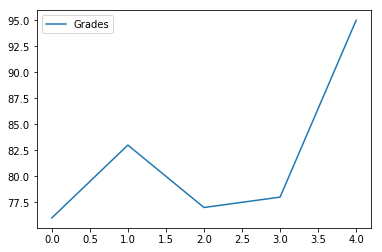

In [10]:
import pandas as pd
%matplotlib inline
names = ['Bob','Jessica','Mary','John','Mel']
grades = [76,83,77,78,95]
GradeList = list(zip(names,grades))
df = pd.DataFrame(data = GradeList,columns=['Names', 'Grades'])
df.plot()

Text(8,0,'my annotation')

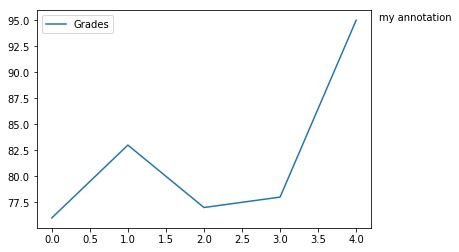

In [11]:
import matplotlib.pyplot as plt
df.plot()
displayText = "my annotation"
xloc = 1
yloc = df['Grades'].max()
xtext = 8
ytext = 0
plt.annotate(displayText,
xy=(xloc, yloc),
xytext=(xtext,ytext),
xycoords=('axes fraction', 'data'),
textcoords='offset points')

Text(8,-150,'my annotation')

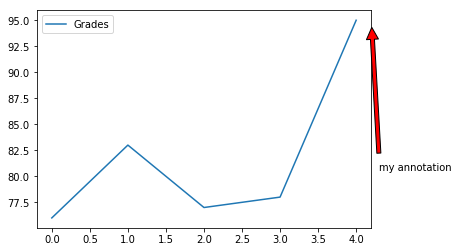

In [15]:
df.plot()
displayText = "my annotation"
xloc = 1
yloc = df['Grades'].max()
xtext = 8
ytext = -150
plt.annotate(displayText,
xy=(xloc, yloc),
arrowprops=dict(facecolor='red',
shrink=0.05),
xytext=(xtext,ytext),
xycoords=('axes fraction', 'data'),
textcoords='offset points')

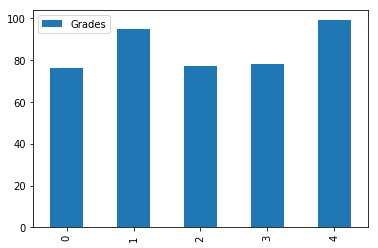

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
names = ['Bob','Jessica','Mary','John','Mel']
status = ['Senior','Freshman','Sophomore','Senior','Junior']
grades = [76,95,77,78,99]
GradeList = list(zip(names,grades))
df = pd.DataFrame(data = GradeList,columns=['Names', 'Grades'])
df.plot(kind='bar')

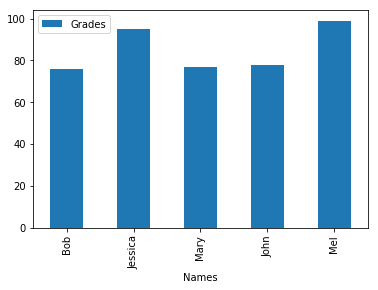

In [17]:
df2 = df.set_index(df['Names'])
df2.plot(kind="bar")

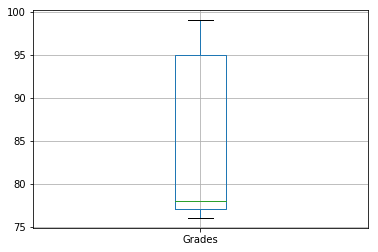

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
names = ['Bob','Jessica','Mary','John','Mel']
grades = [76,95,77,78,99]
gender = ['Male','Female','Female','Male','Female']
status = ['Senior','Senior','Junior','Junior','Senior']
GradeList = list(zip(names,grades,gender))
df = pd.DataFrame(data = GradeList, columns=['Names', 'Grades','Gender'])
df.boxplot(column='Grades')

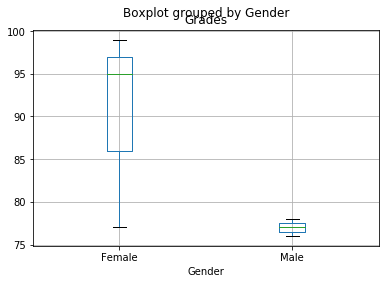

In [19]:
df.boxplot(by='Gender', column='Grades')

(0, 100)

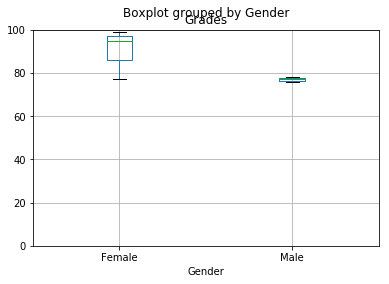

In [20]:
axis1 = df.boxplot(by='Gender', column='Grades')
axis1.set_ylim(0,100)

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
Location = "datasets/gradedata.csv"
df = pd.read_csv(Location)
df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F473ABD30>,
      dtype=object)

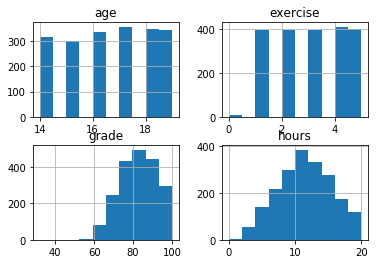

In [22]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F473D7780>]],
      dtype=object)

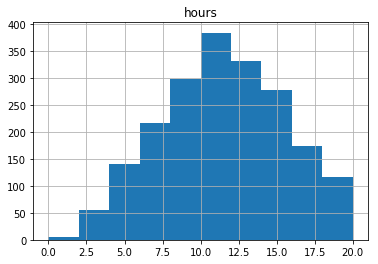

In [23]:
df.hist(column="hours")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F46F88668>]],
      dtype=object)

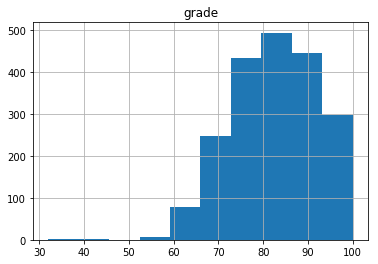

In [26]:
df.hist(column="grade",grid=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F4708F198>,
      dtype=object)

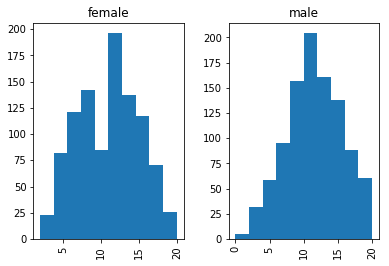

In [27]:
df.hist(column="hours", by="gender")

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
names = ['Bob','Jessica','Mary','John','Mel']
absences = [3,0,1,0,8]
detentions = [2,1,0,0,1]
warnings = [2,1,5,1,2]
GradeList = list(zip(names,absences,detentions,warnings))
columns=['Names', 'Absences', 'Detentions','Warnings']
df = pd.DataFrame(data = GradeList, columns=columns)
df

,Names,Absences,Detentions,Warnings
0,Bob,3,2,2
1,Jessica,0,1,1
2,Mary,1,0,5
3,John,0,0,1
4,Mel,8,1,2


#### ADD VALUES AND PLACE IN NEW COLUMN

In [31]:
df['TotalDemerits'] = df['Absences'] + df['Detentions'] + df['Warnings']
df

,Names,Absences,Detentions,Warnings,TotalDemerits
0,Bob,3,2,2,7
1,Jessica,0,1,1,2
2,Mary,1,0,5,6
3,John,0,0,1,1
4,Mel,8,1,2,11


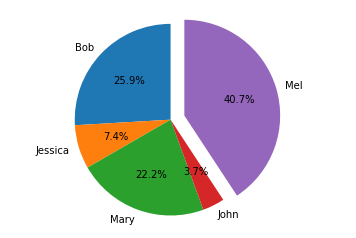

In [33]:
plt.pie(df['TotalDemerits'],
labels=df['Names'],
explode=(0,0,0,0,0.15),
startangle=90,
autopct='%1.1f%%',)
plt.axis('equal')
plt.show()

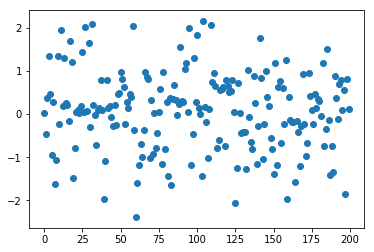

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
dataframe = pd.DataFrame({'Col':np.random.normal(size=200)})
plt.scatter(dataframe.index, dataframe['Col'])